In [1]:
# Import libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Mount in Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**CREATING TRAINING DATASET**

In [93]:
stat = np.empty((140,19))
stat.shape

(140, 19)

In [98]:
i=0

In [100]:
files = [f for f in os.listdir('.') if f.endswith('.csv')]
for f in files:
  
  df = pd.read_csv(f)
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df.dropna(inplace=True)
  df = df.reset_index(drop=True)

  stat[i,0] = np.quantile(df['ACC_X'], 0.25)
  stat[i,1] = np.quantile(df['ACC_X'], 0.5)
  stat[i,2] = np.quantile(df['ACC_X'], 0.75)
  stat[i,3] = np.quantile(df['ACC_Y'], 0.25)
  stat[i,4] = np.quantile(df['ACC_Y'], 0.5)
  stat[i,5] = np.quantile(df['ACC_Y'], 0.75)
  stat[i,6] = np.quantile(df['ACC_Z'], 0.25)
  stat[i,7] = np.quantile(df['ACC_Z'], 0.5)
  stat[i,8] = np.quantile(df['ACC_Z'], 0.75)
  stat[i,9] = np.quantile(df['GYR_X'], 0.25)
  stat[i,10] = np.quantile(df['GYR_X'], 0.5)
  stat[i,11] = np.quantile(df['GYR_X'], 0.75)
  stat[i,12] = np.quantile(df['GYR_Y'], 0.25)
  stat[i,13] = np.quantile(df['GYR_Y'], 0.5)
  stat[i,14] = np.quantile(df['GYR_Y'], 0.75)
  stat[i,15] = np.quantile(df['GYR_Z'], 0.25)
  stat[i,16] = np.quantile(df['GYR_Z'], 0.5)
  stat[i,17] = np.quantile(df['GYR_Z'], 0.75)  
  stat[i,18] = df['label'].mean()
  i=i+1

In [101]:
df_all = pd.DataFrame(stat,columns=['ACCX_25', 'ACCX_50','ACCX_75',
                                    'ACCY_25', 'ACCY_50','ACCY_75',
                                    'ACCZ_25', 'ACCZ_50','ACCZ_75',
                                    'GYRX_25', 'GYRX_50','GYRX_75',
                                    'GYRY_25', 'GYRY_50','GYRY_75',
                                    'GYRZ_25', 'GYRZ_50','GYRZ_75',
                                    'label'])
df_all

,ACCX_25,ACCX_50,ACCX_75,ACCY_25,ACCY_50,ACCY_75,ACCZ_25,ACCZ_50,ACCZ_75,GYRX_25,GYRX_50,GYRX_75,GYRY_25,GYRY_50,GYRY_75,GYRZ_25,GYRZ_50,GYRZ_75,label
0,-1.210938,-1.113281,1.216309,1.386719,1.667969,1.771484,-1.051514,-0.600098,1.130859,-202.65625,152.375,224.00000,-181.50000,-88.37500,104.2500,-152.50000,178.5000,209.2500,2.0
1,-1.161133,-1.008789,1.443848,1.479492,1.705078,1.843750,-1.048828,-0.754883,1.187500,-196.00000,128.250,220.00000,-165.15625,-122.40625,49.8750,-169.00000,181.7500,208.5000,2.0
2,-1.826172,-1.514648,1.722656,0.875000,1.007812,1.180176,-1.910156,1.716797,1.847656,-194.25000,-111.375,123.50000,0.00000,80.75000,201.2500,-236.46875,-194.3750,176.0000,1.0
3,-1.722656,-1.517578,1.072266,1.308594,1.457031,1.833984,-1.161377,-0.854980,1.041016,-178.37500,-21.375,113.00000,-116.37500,0.00000,145.2500,-195.50000,0.0000,58.5000,2.0
4,-1.812744,-1.576172,1.658691,0.734375,1.025391,1.255371,-1.729004,-1.535156,-1.269531,-177.37500,19.375,147.93750,-107.50000,-27.68750,135.8125,-221.25000,157.7500,213.2500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.386719,1.406250,1.460449,1.231934,1.250000,1.280273,-1.824951,-1.808594,-1.762695,-246.00000,237.375,242.56250,-246.00000,-239.12500,244.4375,-246.81250,-244.1875,244.5625,3.0
136,-1.736328,-1.605469,-1.546387,1.267578,1.351562,1.386719,-1.392090,-1.362305,-1.316895,-152.50000,198.000,243.00000,-209.59375,-169.93750,157.1250,-220.68750,-99.4375,193.1250,0.0
137,-1.401855,-1.244141,-1.087402,1.151367,1.484375,1.617188,-1.818359,-1.467773,1.931641,-155.75000,89.000,173.18750,-211.43750,-38.00000,168.1250,-177.00000,30.1875,196.0000,0.0
138,-1.645996,-1.447266,1.735840,0.942383,1.121094,1.179688,1.410156,1.587891,1.705078,-217.78125,-173.750,-10.59375,0.00000,69.62500,151.2500,-223.50000,-108.2500,180.5000,1.0


In [127]:
# Save the full training dataset
#df_all.to_csv('training_dataset.csv')

In [103]:
df_all['label'].value_counts()

2.0    40
1.0    40
0.0    40
3.0    20
Name: label, dtype: int64

In [104]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCX_25  140 non-null    float64
 1   ACCX_50  140 non-null    float64
 2   ACCX_75  140 non-null    float64
 3   ACCY_25  140 non-null    float64
 4   ACCY_50  140 non-null    float64
 5   ACCY_75  140 non-null    float64
 6   ACCZ_25  140 non-null    float64
 7   ACCZ_50  140 non-null    float64
 8   ACCZ_75  140 non-null    float64
 9   GYRX_25  140 non-null    float64
 10  GYRX_50  140 non-null    float64
 11  GYRX_75  140 non-null    float64
 12  GYRY_25  140 non-null    float64
 13  GYRY_50  140 non-null    float64
 14  GYRY_75  140 non-null    float64
 15  GYRZ_25  140 non-null    float64
 16  GYRZ_50  140 non-null    float64
 17  GYRZ_75  140 non-null    float64
 18  label    140 non-null    float64
dtypes: float64(19)
memory usage: 20.9 KB


**SPLITTING DATASET**

In [105]:
# TARGET VARIABLE = TYPE OF SHOT
y = df_all["label"]
y

0      2.0
1      2.0
2      1.0
3      2.0
4      0.0
      ... 
135    3.0
136    0.0
137    0.0
138    1.0
139    2.0
Name: label, Length: 140, dtype: float64

In [107]:
# EXPLANATORY VARIABLES = GYROSCOPE &  ACCELEROMETER STATISTICS
X = df_all.drop("label", axis=1) 
X

,ACCX_25,ACCX_50,ACCX_75,ACCY_25,ACCY_50,ACCY_75,ACCZ_25,ACCZ_50,ACCZ_75,GYRX_25,GYRX_50,GYRX_75,GYRY_25,GYRY_50,GYRY_75,GYRZ_25,GYRZ_50,GYRZ_75
0,-1.210938,-1.113281,1.216309,1.386719,1.667969,1.771484,-1.051514,-0.600098,1.130859,-202.65625,152.375,224.00000,-181.50000,-88.37500,104.2500,-152.50000,178.5000,209.2500
1,-1.161133,-1.008789,1.443848,1.479492,1.705078,1.843750,-1.048828,-0.754883,1.187500,-196.00000,128.250,220.00000,-165.15625,-122.40625,49.8750,-169.00000,181.7500,208.5000
2,-1.826172,-1.514648,1.722656,0.875000,1.007812,1.180176,-1.910156,1.716797,1.847656,-194.25000,-111.375,123.50000,0.00000,80.75000,201.2500,-236.46875,-194.3750,176.0000
3,-1.722656,-1.517578,1.072266,1.308594,1.457031,1.833984,-1.161377,-0.854980,1.041016,-178.37500,-21.375,113.00000,-116.37500,0.00000,145.2500,-195.50000,0.0000,58.5000
4,-1.812744,-1.576172,1.658691,0.734375,1.025391,1.255371,-1.729004,-1.535156,-1.269531,-177.37500,19.375,147.93750,-107.50000,-27.68750,135.8125,-221.25000,157.7500,213.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.386719,1.406250,1.460449,1.231934,1.250000,1.280273,-1.824951,-1.808594,-1.762695,-246.00000,237.375,242.56250,-246.00000,-239.12500,244.4375,-246.81250,-244.1875,244.5625
136,-1.736328,-1.605469,-1.546387,1.267578,1.351562,1.386719,-1.392090,-1.362305,-1.316895,-152.50000,198.000,243.00000,-209.59375,-169.93750,157.1250,-220.68750,-99.4375,193.1250
137,-1.401855,-1.244141,-1.087402,1.151367,1.484375,1.617188,-1.818359,-1.467773,1.931641,-155.75000,89.000,173.18750,-211.43750,-38.00000,168.1250,-177.00000,30.1875,196.0000
138,-1.645996,-1.447266,1.735840,0.942383,1.121094,1.179688,1.410156,1.587891,1.705078,-217.78125,-173.750,-10.59375,0.00000,69.62500,151.2500,-223.50000,-108.2500,180.5000


**TRAIN & TEST**

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30,   #We are taking a test size of 25% and a train size of 75%
                                                    stratify=y,        #in order to preserve target propotions.
                                                    random_state= 123) #fix random seed for replicability
print(X_train.shape, X_test.shape)

(98, 18) (42, 18)


**MULTICLASS CLASSIFICATION PROBLEM**

Classifiers trained:
- decision tree
- logistic regression
- KNN
- random forest
- SVM

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics, datasets
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import math

In [110]:
# Function which reports which are the best hyperparameters for a classifier using Grid Search

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1_micro', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred, average = 'micro'))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [111]:
# Function which shows the confusion matrix which of the trained classifier

def cnf_matrix_multinomial(model,X_train,y_train,X_test,y_test):
    #fit the classifier
    chosen_classifier = model.fit(X_train, y_train)
    #predicted labels
    y_pred = model.predict(X_test)
    #build confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print(cnf_matrix)   
    #show confusion matrix
    disp = plot_confusion_matrix(chosen_classifier, X_test, y_test,
                                 display_labels=["dirtto", "rovescio", "battuta", "no_shot"],
                                 cmap=plt.cm  .Blues)
    plt.title('Confusion matrix of the 4-classes supervised problem')
    plt.show()

* DECISION TREE

In [112]:
%%time
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [5,10,15,20],
              'min_samples_split': [10,15,20],
              'min_samples_leaf': [8,10]}

hyperp_search(classifier,parameters)

f1_train: 0.847222 using {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 10}
f1_test:  0.9047619047619048
[[11  1  0  0]
 [ 3  9  0  0]
 [ 0  0 12  0]
 [ 0  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85        12
         1.0       0.90      0.75      0.82        12
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00         6

    accuracy                           0.90        42
   macro avg       0.92      0.92      0.92        42
weighted avg       0.91      0.90      0.90        42

CPU times: user 306 ms, sys: 23.8 ms, total: 330 ms
Wall time: 2.03 s


In [113]:
#best model according to GridSearch
model_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10  , min_samples_leaf =8, min_samples_split = 10)

[[11  1  0  0]
 [ 3  9  0  0]
 [ 0  0 12  0]
 [ 0  0  0  6]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


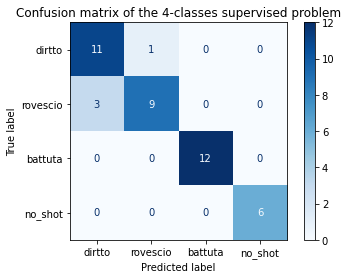

In [114]:
#confusion matrix
cnf_matrix_multinomial(model_tree,X_train,y_train,X_test,y_test)

* LOGISTIC REGRESSION

In [115]:
%%time 
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], 
              "max_iter":[1000, 2000]}

hyperp_search(classifier,parameters)

f1_train: 0.806818 using {'C': 10, 'max_iter': 2000}
f1_test:  0.8095238095238095
[[ 8  2  2  0]
 [ 1 11  0  0]
 [ 1  0  9  2]
 [ 0  0  0  6]]
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73        12
         1.0       0.85      0.92      0.88        12
         2.0       0.82      0.75      0.78        12
         3.0       0.75      1.00      0.86         6

    accuracy                           0.81        42
   macro avg       0.80      0.83      0.81        42
weighted avg       0.81      0.81      0.81        42

CPU times: user 884 ms, sys: 71.6 ms, total: 956 ms
Wall time: 12.8 s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [116]:
#best model according to GridSearch
model_lr = LogisticRegression(C=10, max_iter=2000)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 8  2  2  0]
 [ 1 11  0  0]
 [ 1  0  9  2]
 [ 0  0  0  6]]


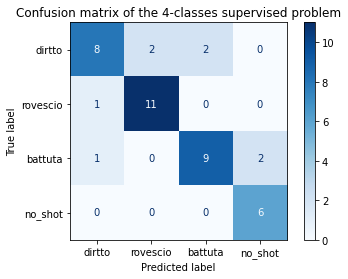

In [117]:
#confusion matrix
cnf_matrix_multinomial(model_lr,X_train,y_train,X_test,y_test)

* KNN

In [118]:
%%time 
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,50,100)}

hyperp_search(classifier,parameters)

f1_train: 0.704861 using {'n_neighbors': 10}
f1_test:  0.7619047619047619
[[ 9  1  2  0]
 [ 1 11  0  0]
 [ 5  0  7  0]
 [ 1  0  0  5]]
              precision    recall  f1-score   support

         0.0       0.56      0.75      0.64        12
         1.0       0.92      0.92      0.92        12
         2.0       0.78      0.58      0.67        12
         3.0       1.00      0.83      0.91         6

    accuracy                           0.76        42
   macro avg       0.81      0.77      0.78        42
weighted avg       0.79      0.76      0.77        42

CPU times: user 31.3 ms, sys: 6.03 ms, total: 37.4 ms
Wall time: 53.9 ms


In [119]:
#best model according to GridSearch
model_knn = KNeighborsClassifier(n_neighbors = 10)

[[ 9  1  2  0]
 [ 1 11  0  0]
 [ 5  0  7  0]
 [ 1  0  0  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


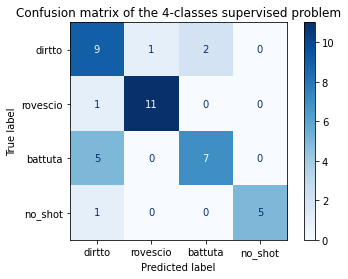

In [120]:
#confusion matrix
cnf_matrix_multinomial(model_knn,X_train,y_train,X_test,y_test)

* RANDOM FOREST 

In [121]:
%%time
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
parameters = {'n_estimators':[10,20,30],
              'criterion':['entropy', 'gini'],
              'max_depth':[5,10,15], 
              'min_samples_split' : [3,5],
              'min_samples_leaf' :[2,5]
              }

hyperp_search(classifier,parameters)


f1_train: 0.969381 using {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 10}
f1_test:  0.9523809523809523
[[10  2  0  0]
 [ 0 12  0  0]
 [ 0  0 12  0]
 [ 0  0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.86      1.00      0.92        12
         2.0       1.00      1.00      1.00        12
         3.0       1.00      1.00      1.00         6

    accuracy                           0.95        42
   macro avg       0.96      0.96      0.96        42
weighted avg       0.96      0.95      0.95        42

CPU times: user 572 ms, sys: 15.5 ms, total: 588 ms
Wall time: 6.42 s


In [122]:
#best model according to GridSearch
model_rf = RandomForestClassifier(n_estimators=10, 
                                  criterion='gini', 
                                  max_depth=15, 
                                  min_samples_split=3, 
                                  min_samples_leaf=2)

[[10  2  0  0]
 [ 2 10  0  0]
 [ 1  0 11  0]
 [ 1  0  0  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


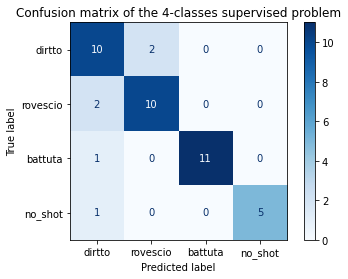

In [123]:
#confusion matrix
cnf_matrix_multinomial(model_rf,X_train,y_train,X_test,y_test)

* SVM

In [124]:
%%time
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','rbf'], "C":[0.1,10,100]}

hyperp_search(classifier,parameters)

f1_train: 0.755366 using {'C': 100, 'kernel': 'rbf'}
f1_test:  0.7857142857142857
[[ 9  2  1  0]
 [ 0 12  0  0]
 [ 4  0  7  1]
 [ 1  0  0  5]]
              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69        12
         1.0       0.86      1.00      0.92        12
         2.0       0.88      0.58      0.70        12
         3.0       0.83      0.83      0.83         6

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.79        42
weighted avg       0.80      0.79      0.78        42

CPU times: user 116 ms, sys: 2.31 ms, total: 119 ms
Wall time: 2.04 s


In [125]:
#best model according to GridSearch
model_svm = SVC(C=100, kernel='rbf', probability=True)

[[ 9  2  1  0]
 [ 0 12  0  0]
 [ 4  0  7  1]
 [ 1  0  0  5]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


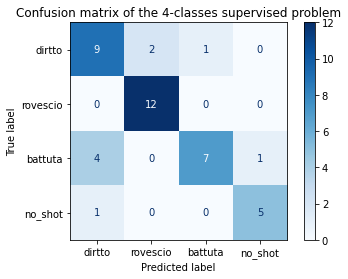

In [126]:
#confusion matrix
cnf_matrix_multinomial(model_svm,X_train,y_train,X_test,y_test)

The best classifier is Random Forest due to
- high F1 score for both training and test
- close F1 scores for training and test, meaning no overfitting problems
- interpretability